Lab 3 Part 2: PPG Analysis

This problem illustrates the basics of PPG analysis; the waveforms are real, and taken from a large dataset used for PPG heart rate performance analysis.

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, get_window, welch, butter, filtfilt
from scipy.fft import fft, fftfreq

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, get_window, welch, butter, filtfilt
from scipy.fft import fft, fftfreq
import csv

In [256]:
# Constants
f_s = 400  # Hz
min_hr = 30  # Minimum heart rate in beats per minute

# Imports
ppg_path = '/Users/egeturan/Documents/Sensing/SmartphoneSensors292S/ee292s/lab3/ecg_data_fs400_hrv_patricia.csv'

def parse_data(file_path):
    # Initialize lists to store the time and ecg_signal data
    time = []
    ecg_signal = []

    # Open and read the CSV file
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        for row in reader:
            # Append the parsed time and ecg_signal values
            time.append(float(row[0]))
            ecg_signal.append(float(row[1]))

    # Convert the lists to NumPy arrays
    time_array = np.array(time)
    ecg_signal_array = np.array(ecg_signal)

    return time_array, ecg_signal_array

Problem 1, a: Time-Domain Heart Rate Analysis

A real PPG waveform sample set is in the file. These samples are normalized to full scale of the ADC, and are sampled at 400Hz. 

In the time domain, using the scipy.find_peaks function, we do a simple peak detection algorithm and use it to compute the time differences between consecutive peaks of the PPG waveform.

From here, we determine the heart rate (the average difference between peaks, in beats-per-minute), as well as the maximum heart rate variability as well as the RMS heart rate variability (HRV). 

Below is our code, as well as the BPM and max/RMS HRV values.

In [257]:
time, ppg = parse_data(ppg_path)

# Define minimum time difference between peaks (based on heart rate)
min_time_diff = min_hr / 60  # Minimum time difference in seconds
min_sample_diff = int(min_time_diff * f_s)  # Convert to sample indices

# Find all peaks
peaks, properties = find_peaks(ppg, distance=min_sample_diff)

print("ppg:", ppg)

ppg: [2.50218362 2.50277311 2.50012666 ... 2.53911943 2.54623443 2.54690201]


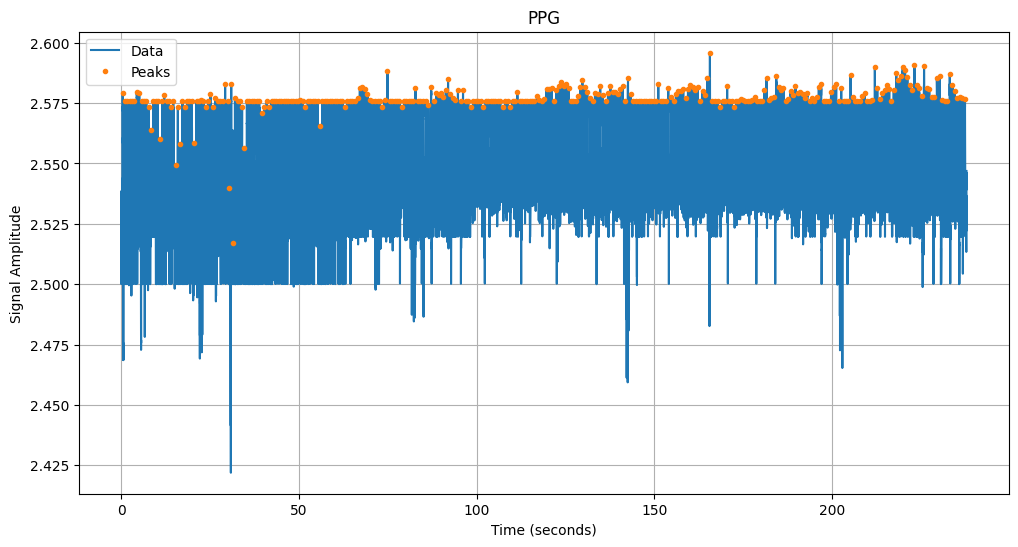

In [258]:
# Plot the full data
plt.figure(figsize=(12, 6))
plt.plot(time, ppg, label="Data")
plt.plot(time[peaks], ppg[peaks], ".", label="Peaks")  # Mark peaks with dots

# Add labels, legend, and title
plt.title("PPG")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [259]:
# Calculate heart rate from peaks
if len(peaks) > 1:
    peak_intervals = np.diff(peaks)  # Differences between consecutive peaks (in samples)
    avg_peak_interval = np.mean(peak_intervals)  # Average interval in samples
    avg_heart_rate = (60 * f_s) / avg_peak_interval  # Convert to beats per minute (BPM)
else:
    avg_heart_rate = 0  # Not enough peaks to calculate heart rate

print(f"Average Heart Rate: {avg_heart_rate:.2f} BPM")

Average Heart Rate: 82.65 BPM


In [260]:
# Calculate Heart Rate Variability (HRV) metrics
if len(peaks) > 1:
    # Convert peak intervals from samples to seconds
    peak_intervals = np.diff(peaks) / f_s

    # HRV metrics
    max_hrv = max(np.max(peak_intervals) - np.mean(peak_intervals), np.mean(peak_intervals) - np.min(peak_intervals))   # Maximum HRV (seconds) - 0-to-peak definition
    rms_hrv = np.std(peak_intervals, ddof=1)                                                                            # Root Mean Square HRV (seconds)

    # Convert to milliseconds for readability
    max_hrv_ms = max_hrv * 1000
    rms_hrv_ms = rms_hrv * 1000
else:
    max_hrv_ms = 0
    rms_hrv_ms = 0

print(f"Max HRV: {max_hrv_ms:.2f} ms")
print(f"RMS HRV: {rms_hrv_ms:.2f} ms")


Max HRV: 205.93 ms
RMS HRV: 47.21 ms


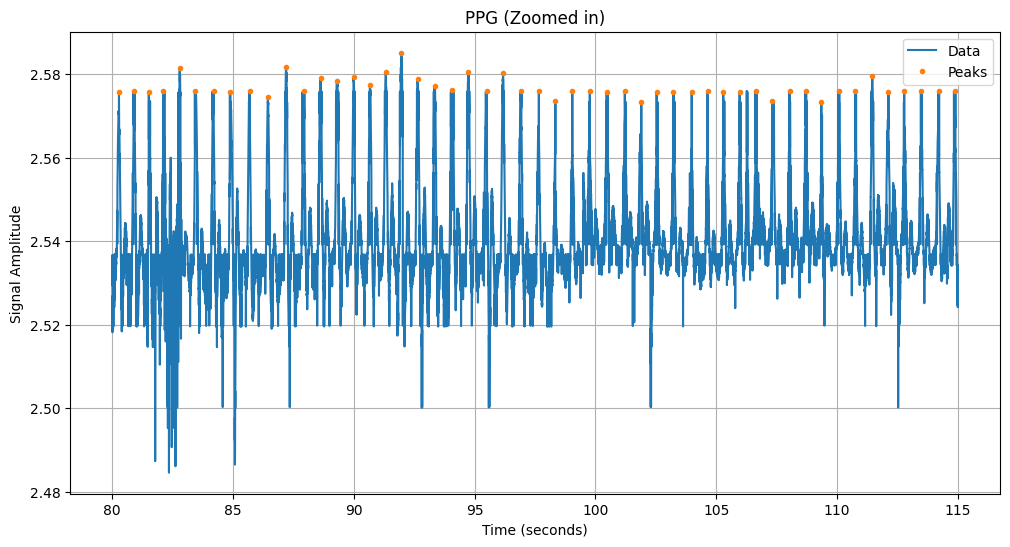

In [ ]:
# Zoomed-in plot for time range
plt.figure(figsize=(12, 6))

# Filter data for the range
zoom_mask = (time >= 80) & (time <= 115)
zoomed_time = time[zoom_mask]
zoomed_ppg = ppg[zoom_mask]

# Find peaks in the zoomed-in data
peaks_zoomed, properties_zoomed = find_peaks(zoomed_ppg, distance=min_sample_diff)

# Adjust the peak indices to align with the original time array
adjusted_peaks = zoomed_time[peaks_zoomed]

# Plot the zoomed-in data
plt.plot(zoomed_time, zoomed_ppg, label="Data")
plt.plot(adjusted_peaks, zoomed_ppg[peaks_zoomed], ".", label="Peaks")  # Correctly positioned peaks

# Add labels, legend, and title
plt.title("PPG (Zoomed in)")
plt.xlabel("Time (seconds)")
plt.ylabel("Signal Amplitude")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [265]:
# Calculate Heart Rate Variability (HRV) metrics
if len(peaks_zoomed) > 1:
    # Convert peak intervals from samples to seconds
    peak_intervals_zoomed = np.diff(peaks_zoomed) / f_s

    # HRV metrics
    max_hrv = max(np.max(peak_intervals_zoomed) - np.mean(peak_intervals_zoomed), np.mean(peak_intervals_zoomed) - np.min(peak_intervals_zoomed))   # Maximum HRV (seconds) - 0-to-peak definition
    rms_hrv = np.std(peak_intervals_zoomed, ddof=1)                                                                            # Root Mean Square HRV (seconds)

    # Convert to milliseconds for readability
    max_hrv_ms = max_hrv * 1000
    rms_hrv_ms = rms_hrv * 1000
else:
    max_hrv_ms = 0
    rms_hrv_ms = 0

print(f"Max HRV: {max_hrv_ms:.2f} ms")
print(f"RMS HRV: {rms_hrv_ms:.2f} ms")

Max HRV: 126.70 ms
RMS HRV: 50.07 ms
